### Introduction

A car company has the data for all the cars that are present in the market. They are planning to introduce some new ones of their own, but first, they want to find out what would be the popularity of the new cars in the market based on each car's attributes.

We will provide you a dataset of cars along with the attributes of each car along with its popularity. Your task is to train a model that can predict the popularity of new cars based on the given attributes.

In [2]:
import warnings
warnings.filterwarnings('ignore')

#for data preprocessing 
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, svm

#for differnt classifier for testing 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#for validation 
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict 

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

### Dataset

You are given a training dataset, train.csv. The file is a comma separated file with useful information for this task:

```train.csv``` contains the information about a car along with its popularity level. Each row provides information on each car. Information such as buying_price, maintenance_cost, number_of_doors, number_of_seats, etc. The definition of each attribute is as follows:<br>

**buying_price**: The buying_price denotes the buying price of the car, and it ranges from [1...4], where buying_price equal to 1 represents the lowest price while buying_price equal to 4 represents the highest price.
        
**maintenance_cost**: The maintenance_cost denotes the maintenance cost of the car, and it ranges from [1...4], where maintenance_cost equal to 1 represents the lowest cost while maintenance_cost equal to 4 represents the highest cost.
        
**number_of_doors**: The number_of_doors denotes the number of doors in the car, and it ranges from [2...5], where each value of number_of_doors represents the number of doors in the car.

**number_of_seats**: The number_of_seats denotes the number of seats in the car, and it consists of [2, 4, 5], where each value of number_of_seats represents the number of seats in the car.

**luggage_boot_size**: The luggage_boot_size denotes the luggage boot size, and it ranges from [1...3], where luggage_boot_size equal to 1 represents smallest luggage boot size while luggage_boot_size equal to 3 represents largest luggage boot size.

**safety_rating**: The safety_rating denotes the safety rating of the car, and it ranges from [1...3], where safety_rating equal to 1 represents low safety while safety_rating equal to 3 represents high safety.

**popularity**: The popularity denotes the popularity of the car, and it ranges from [1...4], where popularity equal to 1 represents an unacceptable car, popularity equal to 2 represents an acc

<h2 style="color:blue">Data prepration </h2>

In [3]:
df = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv', header = None )

In [4]:
df.head()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
0,3,2,4,2,2,2,1
1,3,2,2,5,2,1,1
2,1,4,2,5,1,3,1
3,4,4,2,2,1,2,1
4,3,3,3,4,3,3,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 7 columns):
buying_price         1628 non-null int64
maintainence_cost    1628 non-null int64
number_of_doors      1628 non-null int64
number_of_seats      1628 non-null int64
luggage_boot_size    1628 non-null int64
safety_rating        1628 non-null int64
popularity           1628 non-null int64
dtypes: int64(7)
memory usage: 89.1 KB


In [6]:
print('Size of traning data:' + str(len(df)))
print('Size of test data:' + str(len(test)))

Size of traning data:1628
Size of test data:100


<h2 style="color:blue">Aggregate statistics analysis of data</h2>
Using pandas and matplotlib we can easily anlaysis the dataset 

#### Correlation of different features in dataset

In [7]:
cor = df.corr()
cor

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
buying_price,1.000000,-0.024299,0.002880,0.025954,0.014370,0.027146,-0.227528
maintainence_cost,-0.024299,1.000000,0.005050,0.010661,0.014216,0.016123,-0.192897
number_of_doors,0.002880,0.005050,1.000000,-0.006178,-0.001766,-0.014200,0.055274
number_of_seats,0.025954,0.010661,-0.006178,1.000000,-0.013585,-0.018600,0.367119
luggage_boot_size,0.014370,0.014216,-0.001766,-0.013585,1.000000,-0.006855,0.124521
safety_rating,0.027146,0.016123,-0.014200,-0.018600,-0.006855,1.000000,0.424329
popularity,-0.227528,-0.192897,0.055274,0.367119,0.124521,0.424329,1.000000


#### Heatmap of correlation matrix

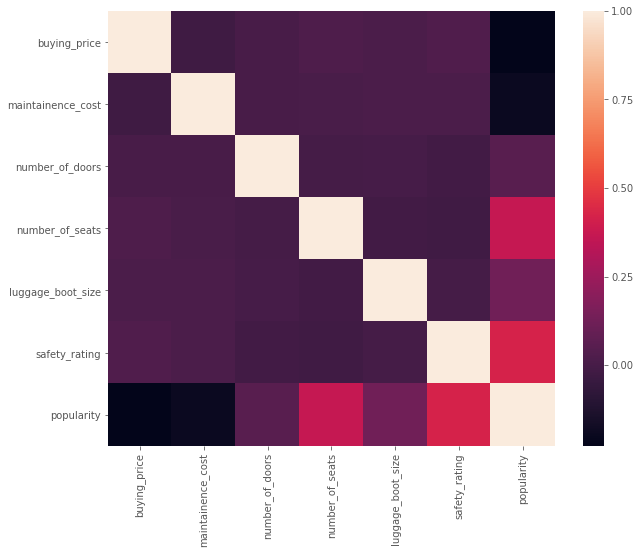

In [8]:
fig, axs = plt.subplots(figsize=(10,8))
sns.heatmap(cor,ax=axs)

From above matrix, it clear that all the features are strongly correlated.<br>
So all the feature have their impotance for popularity

####  Graphs for Group wise distribution for each feature 

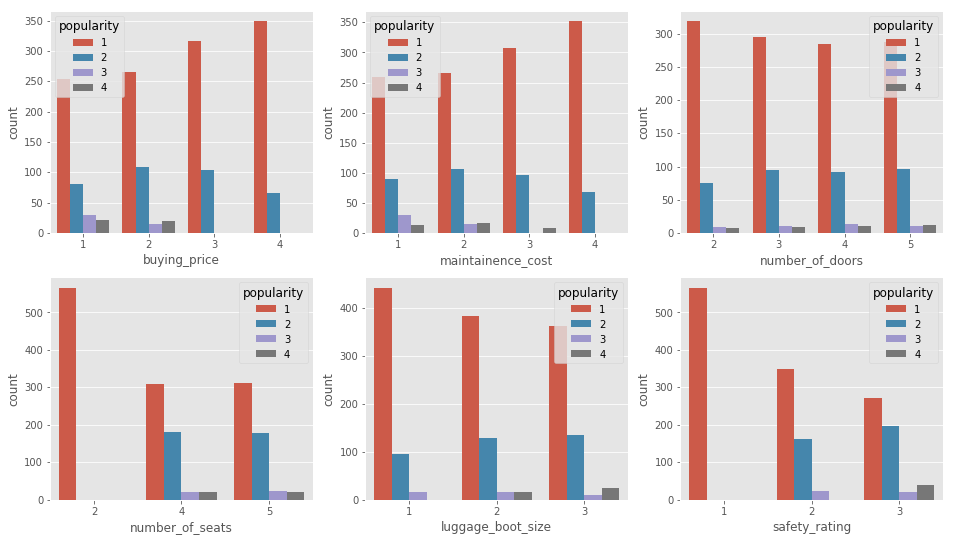

In [9]:
fig, axs = plt.subplots(ncols=3,nrows=2,figsize=(16,9))
sns.countplot(x="buying_price", hue="popularity", data=df,ax = axs[0][0])
sns.countplot(x="maintainence_cost", hue="popularity", data=df,ax = axs[0][1])
sns.countplot(x="number_of_doors", hue="popularity", data=df,ax = axs[0][2])
sns.countplot(x="number_of_seats", hue="popularity", data=df,ax = axs[1][0])
sns.countplot(x="luggage_boot_size", hue="popularity", data=df,ax = axs[1][1])
sns.countplot(x="safety_rating", hue="popularity", data=df,ax = axs[1][2])

#### voting of each Group for each feature 

In [10]:
print (df.groupby(['buying_price','popularity'])['popularity'].count())

buying_price  popularity
1             1             253
              2              80
              3              30
              4              21
2             1             266
              2             109
              3              14
              4              19
3             1             317
              2             104
4             1             349
              2              66
Name: popularity, dtype: int64


In [11]:
print (df.groupby(['maintainence_cost','popularity'])['popularity'].count())

maintainence_cost  popularity
1                  1             260
                   2              89
                   3              29
                   4              14
2                  1             266
                   2             106
                   3              15
                   4              17
3                  1             307
                   2              96
                   4               9
4                  1             352
                   2              68
Name: popularity, dtype: int64


In [12]:
print (df.groupby(['maintainence_cost','popularity'])['popularity'].count())

maintainence_cost  popularity
1                  1             260
                   2              89
                   3              29
                   4              14
2                  1             266
                   2             106
                   3              15
                   4              17
3                  1             307
                   2              96
                   4               9
4                  1             352
                   2              68
Name: popularity, dtype: int64


In [13]:
print (df.groupby(['number_of_doors','popularity'])['popularity'].count())

number_of_doors  popularity
2                1             319
                 2              75
                 3               9
                 4               8
3                1             295
                 2              95
                 3              10
                 4               9
4                1             284
                 2              92
                 3              14
                 4              11
5                1             287
                 2              97
                 3              11
                 4              12
Name: popularity, dtype: int64


In [14]:
print (df.groupby(['number_of_seats','popularity'])['popularity'].count())

number_of_seats  popularity
2                1             565
4                1             308
                 2             181
                 3              21
                 4              20
5                1             312
                 2             178
                 3              23
                 4              20
Name: popularity, dtype: int64


In [15]:
print (df.groupby(['luggage_boot_size','popularity'])['popularity'].count())

luggage_boot_size  popularity
1                  1             441
                   2              96
                   3              16
2                  1             382
                   2             128
                   3              17
                   4              16
3                  1             362
                   2             135
                   3              11
                   4              24
Name: popularity, dtype: int64


In [16]:
print (df.groupby(['safety_rating','popularity'])['popularity'].count())

safety_rating  popularity
1              1             565
2              1             348
               2             163
               3              23
3              1             272
               2             196
               3              21
               4              40
Name: popularity, dtype: int64


<h3 style="color:blue">Creating labeled data for feeding into classifier</h3>

In [17]:
#input data
X = np.array(df.drop(['popularity'],1))
#labeled data
Y = np.array(df['popularity'])  

#### Setting  Standard Scale for data

In [18]:
scale = StandardScaler()
#fitting the scaler
X = scale.fit_transform(X)

#### Creating testing data from given traning set using train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.01,random_state= None)

#### Different classifier for testing accuracy 

In [20]:
classifiers = {
    'KKN' : KNeighborsClassifier(),
    'SVC': svm.SVC(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
    'MLP':MLPClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GaussianNB':GaussianNB(),
    'QuadraticDiscriminant':QuadraticDiscriminantAnalysis()}    

In [21]:
kfold = KFold(n_splits=10, random_state=22)
xyz=[]
accuracy=[]
std=[]
f1_s = []
for name,clf in classifiers.items():
    cv_result = cross_val_score(clf,X_train,Y_train, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    f1_s.append(f1_score(Y_test, Y_pred, average=None))
    
new_clf_dataframe=pd.DataFrame({'mean_accuracy':xyz,'std':std,'F1-scores':f1_s},index=classifiers)       
new_clf_dataframe

,F1-scores,mean_accuracy,std
KKN,"[0.96, 0.888888888889]",0.975159,0.015470
SVC,"[0.916666666667, 0.8]",0.960279,0.013065
DecisionTree,"[0.96, 0.888888888889]",0.973932,0.007746
RandomForest,"[1.0, 1.0]",0.968956,0.013040
GradientBoosting,"[0.95652173913, 0.909090909091]",0.979515,0.008808
MLP,"[1.0, 1.0]",0.968971,0.010361
AdaBoost,"[0.96, 0.888888888889]",0.852277,0.038916
GaussianNB,"[0.846153846154, 0.333333333333, 0.0]",0.768484,0.024194
QuadraticDiscriminant,"[0.833333333333, 0.571428571429, 0.0]",0.682195,0.028722


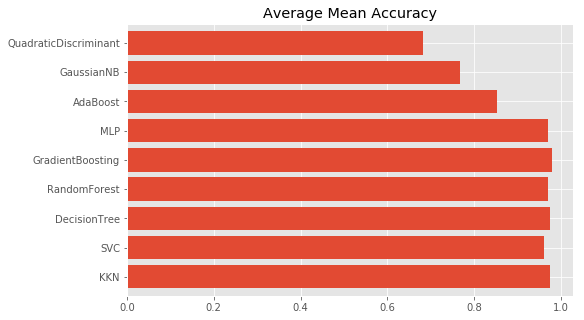

In [22]:
new_clf_dataframe['mean_accuracy'].plot.barh(width=0.8)
plt.title('Average Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Prediction on given testing dataset

In [23]:
test = pd.read_csv('data/test.csv', header = None )
X_t = np.array(test)
X_t = scale.transform(X_t)

from above obersvation we can ses that some of the classifiers is not working well for this problem, so we are taking best classifier

In [24]:
classifiers = {
    'KKN' : KNeighborsClassifier(),
    'SVC': svm.SVC(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'GradientBoosting':GradientBoostingClassifier()}    

### Applying voting on these five classifier

In [25]:
def avg_clf(data):
    cnt = np.zeros([len(data),4])
    for name,clf in classifiers.items():
        # X and Y are orginal traning data 
        clf.fit(X,Y)
        Y_pred = clf.predict(X_t)
        for i,x in enumerate(Y_pred):
            cnt[i][x-1] += 1
    out = []
    for i in  range(len(cnt)):
        my_list = cnt[i].tolist()
        max_value = max(my_list)
        max_index = my_list.index(max_value) + 1
        out.append(max_index)
    return out

In [26]:
def tune():
    mx = 0
    CC = 1
    gg = .01
    kfold = KFold(n_splits=10, random_state=22)
    for c in range(1,5):
        for gm in (1,10):
            clf = svm.SVC(kernel='rbf',C=c,gamma=gm/10)
            cv_result = cross_val_score(clf,X_train,Y_train, cv = kfold,scoring = "accuracy")
            print(c,gm/10,cv_result.mean())
            if(mx<cv_result.mean()):
                mx = cv_result.mean()
                CC = c
                gg = gm/10
    return CC,gg,mx

In [27]:
Y_pred  = avg_clf(X_t)
out =pd.DataFrame(Y_pred)

The above avg_clf is not giving good score after submitting on leaderboard because sometimes it takes two or more high score with same frequency and and predict some from them<br>
**Score: 0.940249 on leaderboard**<br>
which is not better than svm 

#### After Tuning parameters for SVC using tune() function
C = 25 from binary search in (1,30)<br>
gamma = .6 linear form (0.1,0.9)

In [28]:
clf = svm.SVC(kernel='rbf',C=25,gamma=.6)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_t)
out =pd.DataFrame(Y_pred)

**Score =  0.979611 or 1 on differnt submission**

In [29]:
out.to_csv('predictions.csv',index=None,header=None)